# EEE 598 HOMEWORK ASSIGNMENT 1

## By - Pranav Bajoria, ASU ID: 1215321107

### Problem 1 and 4 handwritten problems can be found at the end

### Problem 2: 

Installation was succeddful and all the dependencies were imported successfully without error. Hence the following codes could run successfully.

### Problem 3
Each of the following section consists of the partwise solutions

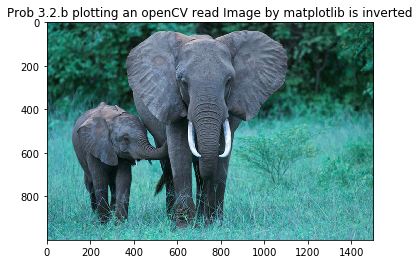

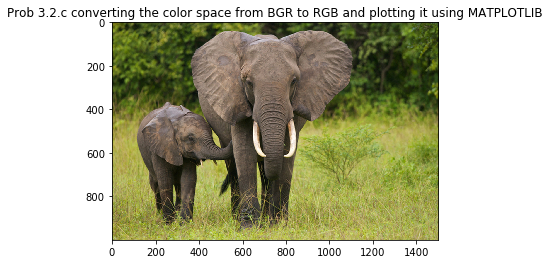

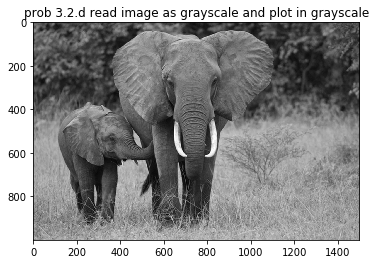

In [196]:
#testimport

################ Section 1.0 Importing all the dependencies #############

import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import ipdb
from scipy import linalg as ln
from scipy import signal
import time

################### Section 2.a Loading and Displaying Images #############

# load image
image = cv2.imread('elephant.jpeg',1)
# display the image
cv2.imshow('image',image)
# wait indefinitely for a key to be pressed
cv2.waitKey(0)
#Destroy all windows after a key is pressed
cv2.destroyAllWindows()
 
################### Section 2.b Using matplot to display images ############

# plotting the image
img = plt.imshow(image)
plt.title('Prob 3.2.b plotting an openCV read Image by matplotlib is inverted')
plt.show()
# saving the image
c = cv2.imwrite('elephant_opencv.png',image)

############## Section 2.c Converting the BGR image to RGB image to display the original image###

#converting the image and mapping to RGB space
imgInverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plotting the inverted image
plt.imshow(imgInverted)
plt.title('Prob 3.2.c converting the color space from BGR to RGB and plotting it using MATPLOTLIB')
plt.show()
c = cv2.imwrite('elephant_matplotlib.png', imgInverted)

#%%########## Section 2.d REading in the image as a Gray Scale image ##########
imgGray = cv2.imread('elephant.jpeg',0)
#plot the image by setting the colormap to Gray to plot a grayscale image
plt.imshow(imgGray, cmap='gray')
plt.title('prob 3.2.d read image as grayscale and plot in grayscale')
plt.show()

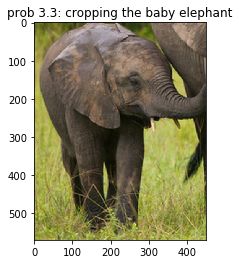

Prob 3.4.b: image data type  uint16


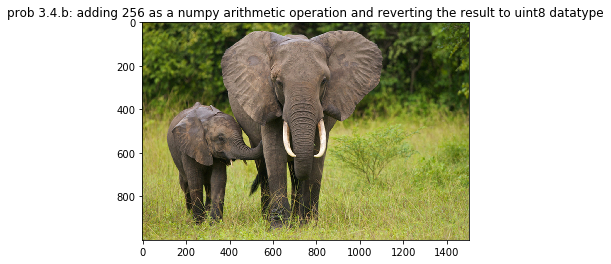

In [157]:
#%%################# Section 3.0 Cropping #####################################################
#cropping rows 380:950 and columns 100:550 to get baby elephant
imCrop = image[380:950, 100:550]
#plotting the cropped image in the correct RGB space
plt.imshow(cv2.cvtColor(imCrop, cv2.COLOR_BGR2RGB))
plt.title('prob 3.3: cropping the baby elephant')
plt.show()
c = cv2.imwrite('babyelephant.png',imCrop)

#%%################## Section 4.b Pixel Wise Arithmetic OPerations using numpy #############################

#adding 256 to every pixel of the RGB image loaded in section 2.c
imgHigh = imgInverted + 256
print('Prob 3.4.b: image data type ', imgHigh.dtype)
#convert the uint16 to uint8 image
imgReverted = np.uint8(imgHigh) 
plt.imshow(imgReverted)
plt.title('prob 3.4.b: adding 256 as a numpy arithmetic operation and reverting the result to uint8 datatype')
plt.show()

### Q.b. Why does it look like there is no change in the image?
Ans: Adding 256 to each pixel converted the dtype of the image to uint16 from uint8.
    Adding 256 in the decimal number system is equivalent to setting the 9th LSB to 1 and remaining 8 LSBs are unaffected.
    When np.uint8(image) is applied, a bitwise and operation is performed over this 16 bits with respect to 0XFF, thus truncating the first 8 MSBs and hence retaining back the original values of the image. Therefore, the image looks exactly the same as before upon dtype conversion from uint16 to uint8.


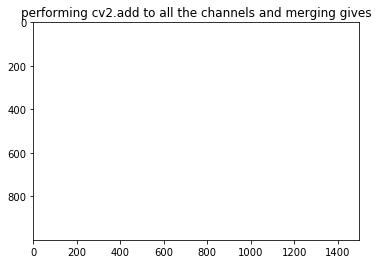

In [197]:
#%%################ Section 4.c pixelwise arithmetic using opencv##########################################
#splitting the image into bgr channels
b,g,r = cv2.split(image)
#adding 256 to each channel
b_add = cv2.add(b,256)
g_add = cv2.add(g,256)
r_add = cv2.add(r,256)
#merging the channels to form a new image
imgMerged = cv2.merge((b_add,g_add,r_add))
plt.imshow(cv2.cvtColor(imgMerged, cv2.COLOR_BGR2RGB))
plt.title('performing cv2.add to all the channels and merging gives')
plt.show()

### Q.c. Describe the image you see. Why was this different from step b?
Ans: Upon merging the channels after CV addition, the image is completely white as all channel values are 255. This is because Open CV addition is different from numpy addition. In numpy addition, there was an extra bit added and the dtype changed to uint16, while opencv addition is a saturated operation making the highest possible value 255 after addition.

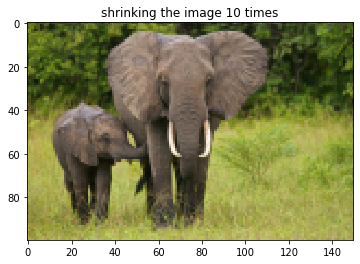

In [159]:
#%%################# Section  5.a and 5.b Resizing Images ########################################
imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#downsampling by a factor of 10

imgResize = cv2.resize(imgRGB, None, fx = 0.1, fy = 0.1, interpolation = cv2.INTER_AREA)
plot = plt.imshow(imgResize)
plt.title('shrinking the image 10 times')
plt.show()
c = cv2.imwrite('elephant_10xdown.png',cv2.cvtColor(imgResize,cv2.COLOR_RGB2BGR))

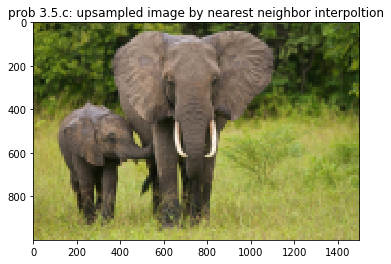

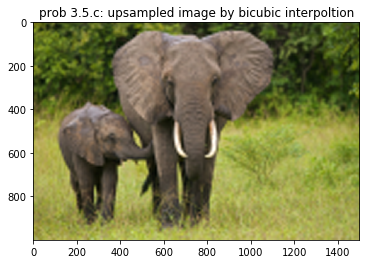

error by Nearest Neighbor interpolation is  40613541
error by Bicubic interpolation is  35910644


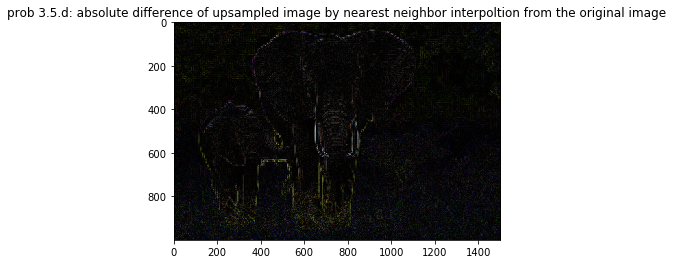

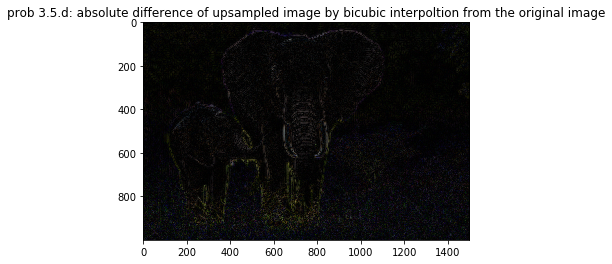

In [160]:
#%%####### Section 5.c upsampling the shrinked image ##################
#first upsample using nearest neighbor
imgUpsampledNearest = cv2.resize(imgResize, None, fx = 10, fy = 10, interpolation = cv2.INTER_NEAREST)
cv2.imwrite('elephant_10xup_nearest.png', cv2.cvtColor(imgUpsampledNearest, cv2.COLOR_RGB2BGR))
imgUpsampledCubic = cv2.resize(imgResize, None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
cv2.imwrite('elephant_10xup_cubic.png', cv2.cvtColor(imgUpsampledCubic, cv2.COLOR_RGB2BGR))
plt.imshow(imgUpsampledNearest)
plt.title('prob 3.5.c: upsampled image by nearest neighbor interpoltion')
plt.show()
plt.imshow(imgUpsampledCubic)
plt.title('prob 3.5.c: upsampled image by bicubic interpoltion')
plt.show()
#%%######### Section 5.d calculating absdifference and total error #######

#absolute difference of upsampled image by nearest neighbor interpoltion from the original image
diffNearestArr = cv2.absdiff(imgUpsampledNearest,imgRGB)

#absolute difference of upsampled by bicubic interpolation image from the original image
diffCubicArr = cv2.absdiff(imgUpsampledCubic,imgRGB)

#summing all elements in the difference matrix to find out the errors in both the interpolation methods 
errorNearest = np.sum(diffNearestArr)
errorCubic = np.sum(diffCubicArr)
print('error by Nearest Neighbor interpolation is ', errorNearest)
print('error by Bicubic interpolation is ', errorCubic)

#plotting the difference
plt.imshow(diffNearestArr)
plt.title('prob 3.5.d: absolute difference of upsampled image by nearest neighbor interpoltion from the original image')
plt.show()

plt.imshow(diffCubicArr)
plt.title('prob 3.5.d: absolute difference of upsampled image by bicubic interpoltion from the original image')
plt.show()


### Prob 3.5.d Which method caused less error in upsampling?
Ans: Bicubic interpolation upsampling caused less error than nearest neighbor as averaging and smoothening before downsampling can retain some information.

### Problem 4 2D Convolution

Source citation: https://github.com/alisaaalehi/convolution_as_multiplication/blob/master/ConvAsMulExplained.pdf

The explanation of the code and the concept can be found in the comments

In [173]:

def vector2matrix(vec, opShape):
    opRow, opCol = opShape
    op = np.zeros(opShape, dtype = vec.dtype)
    for i in range(opRow):
        start = i*opCol
        end = start + opCol
        op[i, :] = vec[start:end]
        
    return op

In [174]:
def matrix2vector(mat):
    matRow, matCol = mat.shape
    outputVector = np.zeros(matRow*matCol,dtype=mat.dtype)
    for i,row in enumerate(mat):
        startPoint = i*matCol
        endPoint = startPoint + matCol
        outputVector[startPoint:endPoint] = row
        
    return outputVector

In [175]:
####################### Function for convolution of 2 matrices ################
def conv2dmatrix(Img, Filter):
    
    #store the time the code starts
    start = time.time()
    
    #Inverting the filter around the vertical axis for convolution
    Filter = np.flip(Filter)
    
    #Calculating the size of the output image based on the filter and input image size given by
    #OutputRow,OutputColumn = filterRow+imgRow-1 , filterColumn+imgCol-1
    imgRow, imgCol = Img.shape
    filterRow, filterCol = Filter.shape
    
    #output image dimensions
    resultImgRow = imgRow+filterRow-1
    resultImgCol = imgCol+filterCol-1
    
    #padding zeros to the filter to replicate the output matrix dimensions
    padFilter = np.pad(Filter, ((resultImgRow-filterRow,0),(0,resultImgCol-filterCol)),'constant',constant_values=0)
    #print(padFilter)
    
    ###########################Create individual toeplitz matrices##########
    #to create toeplitz matrices, we need to make sure that each toeplitz matrix is of the same no. of columns as the input image
    
    #creating a list for stacking the toeplitz matrices to build the final H matrix
    toeplitzStack = []
    #since we start to fill up matrices from the last row of the padded filter, we iterate from last row to first
    for i in range(padFilter.shape[0]-1,-1,-1):
        # extract column that has to be passed to the toepliz function 
        col = padFilter[i,:]
        #initiate first row of toeplitz with zeros other than the first value
        row = np.r_[col[0], np.zeros(imgCol-1)]
        #call toeplitz function with the set parameters
        tMatrix = ln.toeplitz(col,row)
        #stack the matrix in the list
        toeplitzStack.append(tMatrix)

    
    #the toeplitz matrix of the small toeplitz matrices can have no. of columns = no. of rows in the Input image matrix 
    #and the number of small toeplitz matrices in each column should be same as the output image's no. of rows
    colBigIndices = range(1,resultImgRow+1)
    rowBigIndices = np.r_[colBigIndices[0],np.zeros(imgRow-1,dtype=int)]
    
    #generating the indices in the Bigger Toeplitz matrix to fill with their respective smaller toeplitz from the stack.
    
    indicesBig = ln.toeplitz(colBigIndices,rowBigIndices)
    
    #Finally generate the big toeplitx matrix
    
    #First calculating the shape and size
    
    rowsBig = tMatrix.shape[0]*indicesBig.shape[0]
    colBig = tMatrix.shape[1]*indicesBig.shape[1]
    toeplitzBigShape = [rowsBig,colBig]
    toeplitzBigMatrix = np.zeros(toeplitzBigShape)
    

    #each small toeplitz matrice's height and width
    small_h, small_w = tMatrix.shape[0], tMatrix.shape[1]
    for i in range(indicesBig.shape[0]):
        for j in range(indicesBig.shape[1]):
            iStart = i * small_h
            jStart = j * small_w
            iEnd = iStart + small_h
            jEnd = jStart + small_w
            toeplitzBigMatrix[iStart:iEnd, jStart:jEnd] = toeplitzStack[indicesBig[i,j]-1]
    
    #Now convert the input image to a column vector to enable matrix multiplication
    inputImgVectorized = matrix2vector(Img)
    
    #now multiply the vectorized input with the big toeplitz to get result
    resultImgVec = np.matmul(toeplitzBigMatrix, inputImgVectorized)
    
    resultImgMat = vector2matrix(resultImgVec, padFilter.shape)
    
    timeTaken = time.time() - start
    resultByFunc = signal.convolve(Img, Filter, mode ='full')
    
# Calculating error
    difference = resultImgMat - resultByFunc
    error = np.sum(difference)
    return resultImgMat, timeTaken, error


the result by matrix mul of the given array is 
 [[ -1.  -2.  -2.   2.   3.]
 [ -5.  -7.  -4.   7.   9.]
 [-12. -15.  -6.  15.  18.]
 [-11. -13.  -4.  13.  15.]
 [ -7.  -8.  -2.   8.   9.]]

 the time taken is  0.0009965896606445312

 the error in convolving the matrix is  0.0


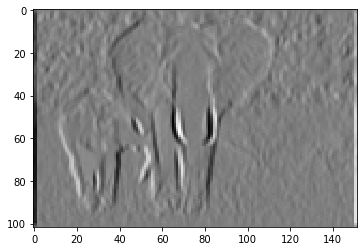

the result by matrix mul of the elephant image is 
 [[ -98.  -95.   -5. ...   15.   83.   64.]
 [-198. -203.   -7. ...   31.  159.  127.]
 [-281. -312.  -33. ...   18.  241.  214.]
 ...
 [-457. -443.   26. ...   15.  472.  468.]
 [-309. -313.   20. ...    2.  314.  316.]
 [-153. -164.    1. ...    3.  161.  160.]]

 the time taken for image convolution is 1.9697837829589844

 the error in convolving the Image is  0.0


In [176]:
### Problem 4.b Computing i*h by matrix multiplication

   
#%%###################### Main ##############################    
#image input as the given matrix
mat = np.array([[1,2,3],[4,5,6],[7,8,9]])

#filter or kernel to convolute
kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
result, timeElapsed, errorMat = conv2dmatrix(mat,kernel)
print('the result by matrix mul of the given array is \n', result)
print('\n the time taken is ', timeElapsed)
print('\n the error in convolving the matrix is ', errorMat)

### Problem 4.c Generalising and testing conv2dmatrix for an image

#test it on the image
elephant = cv2.imread('elephant_10xdown.png',0)
resultImg, timeImg, errorImg = conv2dmatrix(elephant, kernel)
plt.imshow(resultImg, cmap='gray')
plt.show()
print('the result by matrix mul of the elephant image is \n', resultImg)
print('\n the time taken for image convolution is', timeImg)
print('\n the error in convolving the Image is ', errorImg)

## Problem 5 Fourier Domain Fun


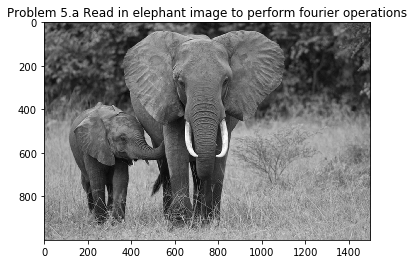

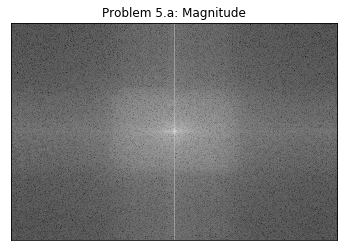

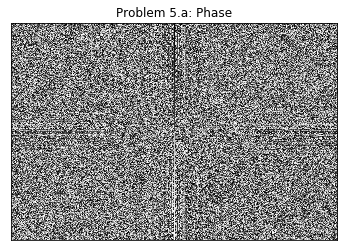

In [181]:
#%%######## Section 5.a Fourier transform of the image ######

#reading in the image as a grayscale
img = cv2.imread('elephant.jpeg',0)
plt.imshow(img, cmap='gray')
plt.title('Problem 5.a Read in elephant image to perform fourier operations')
plt.show()
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fourierImg = np.copy(fshift)
fourierCopy = np.copy(fshift)
magnitudeSpectrum = 20*np.log(np.abs(fshift))
phaseSpectrum = np.angle(fshift)
plt.imshow(magnitudeSpectrum, cmap='gray')
plt.title('Problem 5.a: Magnitude'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(phaseSpectrum, cmap='gray')
plt.title('Problem 5.a: Phase'), plt.xticks([]), plt.yticks([])
plt.show()

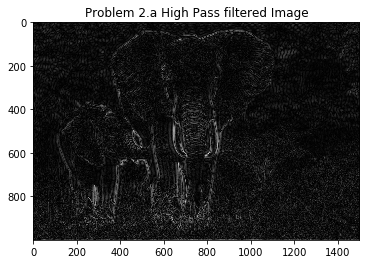

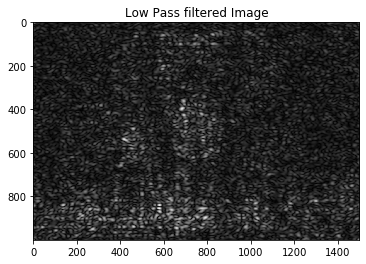

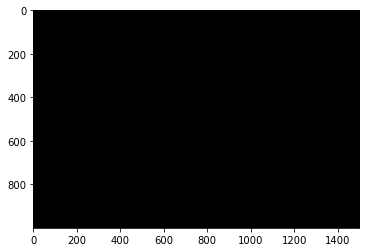

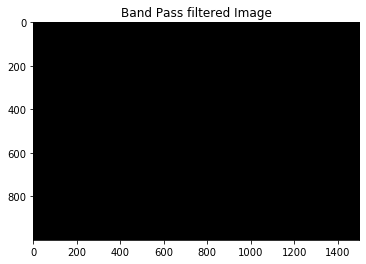

In [195]:
#%%####### Section 5.a (1) Applying High Pass filter ###########

#making the low frequency elements in the frequesncy domain imgae 0 to remove them
#getting the midpoint of the image to iterate 40 up and down 
fshift[(img.shape[0]//2)-40 : (img.shape[0]//2)+40, (img.shape[1]//2)-40 : (img.shape[1]//2)+40] = 0

#performing inverse fourier transform
fIshift = np.fft.ifftshift(fshift)
imgHighPass = np.fft.ifft2(fIshift)
imgHighPass = np.absolute(imgHighPass)

#plotting the highPass Image
plt.imshow(imgHighPass, cmap='gray')
plt.title('Problem 2.a High Pass filtered Image')
plt.show() 

#%%#### Section 5.b (2) Applying Low Pass filter #####making the high frequency elements in the frequesncy domain imgae 0 to remove them
imgMask = np.zeros((1000,1500), np.uint8)
imgMask[(img.shape[0]//2)-50 : (img.shape[0]//2)+50, (img.shape[1]//2)-50 : (img.shape[1]//2)+50] = 1
fs = fourierImg*imgMask
fIshiftLowPass = np.fft.ifftshift(fs)
imgLowPass = np.fft.ifft2(fIshiftLowPass)
imgLowPass = np.absolute(imgLowPass)

#plotting the highPass Image
plt.imshow(imgLowPass, cmap='gray')
plt.title('Low Pass filtered Image')
plt.show() 

#%%## Section 5.b (3) Applying Band Pass filter #########

#making the middle frequency elements in the frequesncy domain imgae 0 to remove them
# fourierImg[(img.shape[0]//2)-40 : (img.shape[0]//2)+40, (img.shape[1]//2)-40 : (img.shape[1]//2)+40] = 0
imgMaskDiag = np.zeros((1000,1500), np.uint8)
imgMaskDiag[(img.shape[0]//2)-200 : (img.shape[0]//2)+200, (img.shape[1]//2)-300 : (img.shape[1]//2)+300] = 1
imgMaskDiag[(img.shape[0]//2)-40 : (img.shape[0]//2)+40, (img.shape[1]//2)-60 : (img.shape[1]//2)+60] = 0
plt.imshow(imgMaskDiag, cmap = 'gray')
plt.show()
bandPassFourier = fourierImg*imgMaskDiag
plt.imshow(np.absolute(np.fft.ifft2(np.fft.ifftshift(bandPassFourier))), cmap='gray')
plt.title('Band Pass filtered Image')
plt.show()

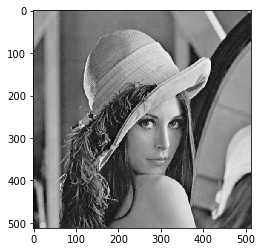

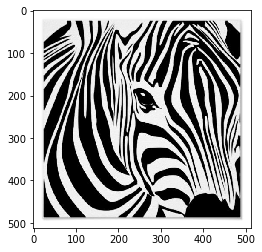

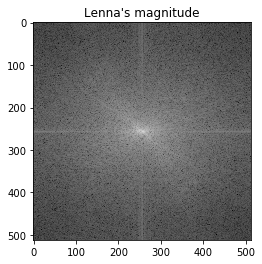

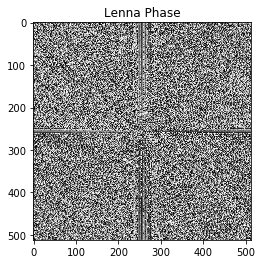

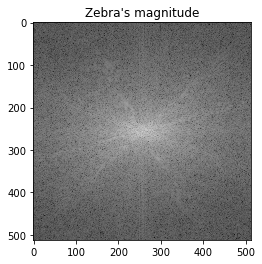

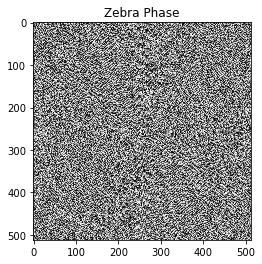

In [183]:
#%%###### Section 5.c Combining phase and magnitude of 2 different images ###

imgLenna = cv2.imread('Lenna.jpg',0)
plt.imshow(imgLenna, cmap = 'gray')
plt.show()
imgZebra = cv2.imread('zebra.jpg',0)
plt.imshow(imgZebra, cmap = 'gray')
plt.show()
fLenna = np.fft.fftshift(np.fft.fft2(imgLenna))

#extracting magnitude and phase from the fourier transformed images
magnitudeLenna = np.abs(fLenna)
phaseLenna = np.angle(fLenna)
plt.imshow(20*np.log(magnitudeLenna), cmap='gray')
plt.title('Lenna\'s magnitude')
plt.show()
plt.imshow(phaseLenna, cmap='gray')
plt.title('Lenna Phase')
plt.show()
fZebra = np.fft.fftshift(np.fft.fft2(imgZebra))

#extracting magnitude and phase from the fourier transformed images
magnitudeZebra = np.abs(fZebra)
phaseZebra = np.angle(fZebra) 
plt.imshow(20*np.log(magnitudeZebra), cmap='gray')
plt.title('Zebra\'s magnitude')
plt.show()
plt.imshow(phaseZebra, cmap='gray')
plt.title('Zebra Phase')
plt.show()

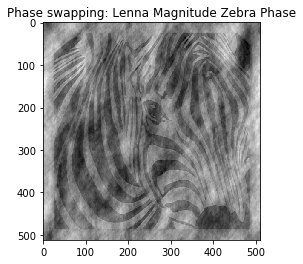

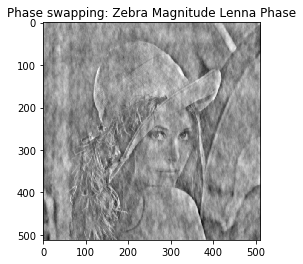

In [184]:
#combining the phase of 1 and magnitude of other by mag*exp(j*phase)
LennaMagZebraPhase = np.multiply(magnitudeLenna, np.exp(1j*phaseZebra))

#extracting the real part of the array to display the image
LennaMagZebraPhaseImg = np.real(np.fft.ifft2(np.fft.ifftshift(LennaMagZebraPhase)))
plt.imshow(LennaMagZebraPhaseImg, cmap='gray')
plt.title('Phase swapping: Lenna Magnitude Zebra Phase')
plt.show()

ZebraMagLennaPhase = np.multiply(magnitudeZebra, np.exp(1j*phaseLenna))

#extracting the real part of the array to display the image
ZebraMagLennaPhaseImg = np.real(np.fft.ifft2(np.fft.ifftshift(ZebraMagLennaPhase)))
plt.imshow(ZebraMagLennaPhaseImg, cmap='gray')
plt.title('Phase swapping: Zebra Magnitude Lenna Phase')
plt.show()

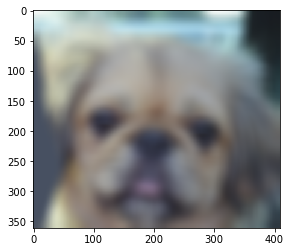

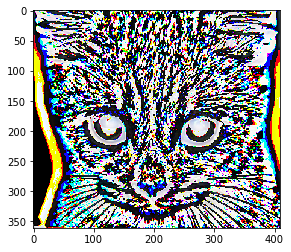

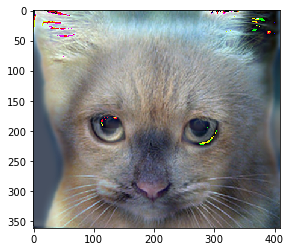

In [185]:
#%%####### Section 2.3 Hybrid images #################

imgCat = cv2.imread('cat.jpg',1)
imgDog = cv2.imread('dog.jpg',1)
dogBlur = cv2.GaussianBlur(imgDog,(25,25),11,cv2.BORDER_DEFAULT)
catBlur = cv2.GaussianBlur(imgCat,(25,25),11,cv2.BORDER_DEFAULT)
catSharp = imgCat - catBlur
plt.imshow(cv2.cvtColor(dogBlur, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(catSharp, cv2.COLOR_BGR2RGB))
plt.show()
hybrid = dogBlur + catSharp
plt.imshow(cv2.cvtColor(hybrid, cv2.COLOR_BGR2RGB))
plt.show()

### Problem 6 Multiresolution Blending using Laplacian/ Gaussian Pyramids

In [186]:
#Gaussian Pyramid
def GaussianPyramid(image, levels, kernel_tup, stdDev):
    gaussianPyramid = []
    
    for i in range(levels):
        gaussianPyramid.append(image)
        blurredImg = cv2.GaussianBlur(image,kernel_tup, stdDev, cv2.INTER_AREA)
        image = cv2.resize(blurredImg,(image.shape[0]//2,image.shape[1]//2),fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
        
    return gaussianPyramid

In [187]:
# function for Laplacian Pyramid
def LaplacianPyramid(image, levels, kernTup, sDev):
    laplacianStack = []
    #while downsampling
    for i in range(levels):
        
        #G = blurring and downsampling
        blurredImg = cv2.GaussianBlur(image,kernTup,sDev,cv2.BORDER_DEFAULT)
        shrinkedImg = cv2.resize(blurredImg,(image.shape[0]//2,image.shape[1]//2),fx=0.5,fy=0.5)
        
        #F = blurring and upsampling
        blurShrinked = cv2.GaussianBlur(shrinkedImg,kernTup,sDev,cv2.BORDER_DEFAULT)
        upSampled = cv2.resize(blurShrinked,(image.shape[0],image.shape[1]),fx=2,fy=2)
        
        #Laplacian image = (I-FiGi)Img
        laplacianImage = cv2.subtract(image, upSampled)        
        if(i==levels-1):
            laplacianStack.append(blurredImg)
        else:
            laplacianStack.append(laplacianImage)

        image = shrinkedImg
    return laplacianStack

In [188]:
def laplaceReconstruct(lapStack, kernTup, sDev):
    reconstrcutedPyramid = []
    image = lapStack[len(lapStack)-1]    
    for i in range(len(lapStack)-1,0,-1):
        reconstrcutedPyramid.append(image)
        imgAtUpperLevel = lapStack[i-1]
        
        #F = blurring and upsampling
        blurShrinked = cv2.GaussianBlur(image,kernTup,sDev,cv2.BORDER_DEFAULT)
        upSampled = cv2.resize(blurShrinked,(imgAtUpperLevel.shape[0],imgAtUpperLevel.shape[1]),fx=2,fy=2)
        
        #Laplacian image = (I-FiGi)Img
        image = cv2.add(imgAtUpperLevel, upSampled)
    reconstrcutedPyramid.append(image)
    return reconstrcutedPyramid
        

In [189]:
#function for multiresolution Blending
def multiblend(img1, img2):
    mask = np.zeros(img1.shape,np.float64)
    mask[:,0:(mask.shape[1]//2)] = 1
    levels = 4
    kern = (31,3)
    stdDev = 30
    maskPyramid = GaussianPyramid(mask, levels, kern, stdDev)
    lapOrange = LaplacianPyramid(img1,levels,kern, stdDev)
    lapApple = LaplacianPyramid(img2,levels,kern, stdDev)
    blendedLapPyramid = []
    for i in range(levels):
        blendedLapPyramid.append(cv2.add(maskPyramid[i]*lapOrange[i],(1-maskPyramid[i])*lapApple[i]))
    blendedReconPyramid = laplaceReconstruct(blendedLapPyramid, kern, stdDev)
    return blendedReconPyramid[len(blendedReconPyramid)-1]

### Part a Gaussian and Laplacian Pyramids

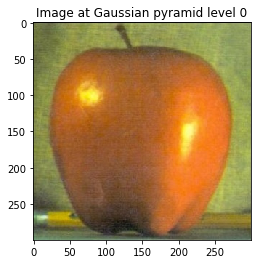

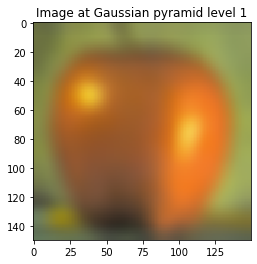

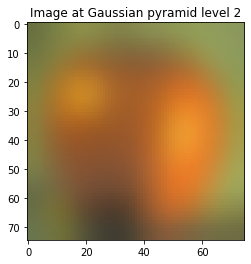

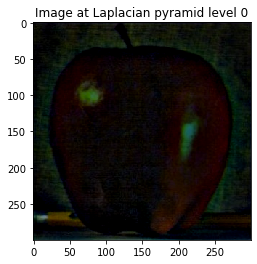

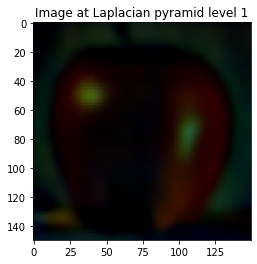

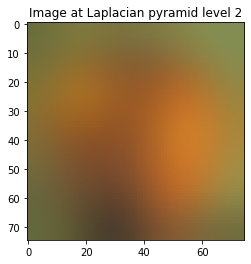

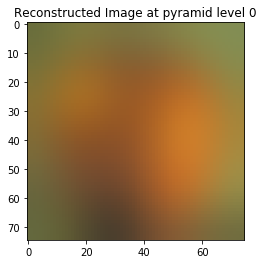

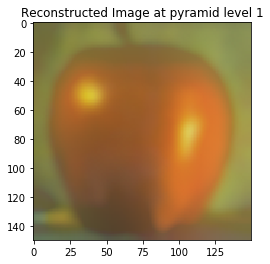

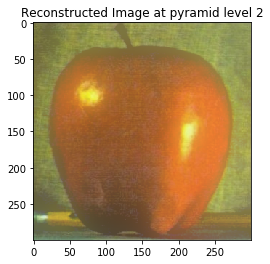

In [190]:
# load image
img = cv2.imread('apple.jpeg',1)
appleGaussPyramid = GaussianPyramid(img, 3, (35,35), 11)
for i in range(len(appleGaussPyramid)):
    plt.imshow(cv2.cvtColor(appleGaussPyramid[i], cv2.COLOR_BGR2RGB))
    plt.title('Image at Gaussian pyramid level '+str(i))
    plt.show()

lap = LaplacianPyramid(img,3, (45,45), 7)
for i in range(len(lap)):
    plt.imshow(cv2.cvtColor(lap[i], cv2.COLOR_BGR2RGB))
    plt.title('Image at Laplacian pyramid level '+str(i))
    plt.show()
    

# Reconstruction
recon = laplaceReconstruct(lap, (45,45), 7)
for j in range(len(recon)):
    plt.imshow(cv2.cvtColor(recon[j], cv2.COLOR_BGR2RGB))
    plt.title('Reconstructed Image at pyramid level '+str(j))
    plt.show()

Following is the reconstruction error for laplacian pyramid

The reconstruction error for the Laplacian Pyramid is  1045148


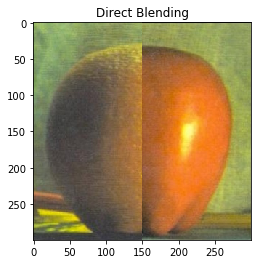

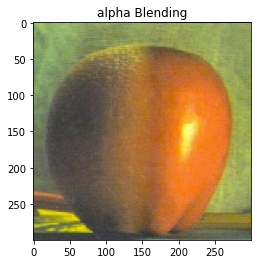

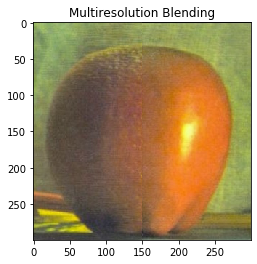

In [191]:
reconstructionDiff = cv2.subtract(recon[j],img)
print('The reconstruction error for the Laplacian Pyramid is ', np.sum(reconstructionDiff))

# part b

apple = cv2.imread('apple.jpeg',1)
orange = cv2.imread('orange.jpeg',1)

#converting them to double precision
appleDouble = np.float64(apple)
orangeDouble = np.float64(orange)

# part c Creating a mask

#the mask has same size as apple image
mask = np.zeros(appleDouble.shape,np.float64)
mask[:,0:(mask.shape[1]//2)] = 1
maskAbs = cv2.convertScaleAbs(mask)
maskAbs = cv2.normalize(maskAbs, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1)


### part d: Direct Blending

#I = (1-M)*I1 + M*I2

# orangeMasked = cv2.bitwise_and(orangeDouble,orangeDouble,mask=mask)
orangeMasked = mask * orangeDouble 
appleMasked = (1-mask)*appleDouble
orapple = orangeMasked+appleMasked
plt.imshow(cv2.cvtColor(np.uint8(orapple),cv2.COLOR_BGR2RGB))
plt.title('Direct Blending')
plt.show()

# part e Alpha Blending

# applying gaussian filter to the mask
filteredMask = cv2.GaussianBlur(mask, (33,33), 45)
alphaOrapple = filteredMask*orangeDouble + (1-filteredMask)*appleDouble
plt.imshow(cv2.cvtColor(np.uint8(alphaOrapple),cv2.COLOR_BGR2RGB))
plt.title('alpha Blending')
plt.show()

### part f: Multiresolution Blending

# plt.imshow(cv2.cvtColor(np.uint8(mask),cv2.COLOR_BGR2RGB))
orAppleMulti = multiblend(orangeDouble,appleDouble)
orAppleAbs = cv2.convertScaleAbs(orAppleMulti)
orAppleAbs = cv2.normalize(orAppleAbs, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1)
plt.imshow(cv2.cvtColor(orAppleAbs,cv2.COLOR_BGR2RGB))
plt.title('Multiresolution Blending')
plt.show()